In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def castFloat(str):
    return float(str.replace(',','.'))

In [3]:
# Read a file and push the elements into a list
def fileToList(fileName):
    list = []
    try:
        file = open(fileName)
        for line in file:
            list.append(castFloat(line))
        file.close()
    except IOError:
        print(fileName + ' could not be opened!')
    return list

In [4]:
# This method summarizes the 10 execution of a test
def processTest(variation, type_alg, nr_steps):
    completeData = []
    for i in range(nr_steps):
        path = 'TESTS/%s/%d/%sTime'%(variation, i+1, type_alg)
        avg = np.mean(fileToList(path))
        completeData.append(avg)
    
    return completeData

In [5]:
nr_steps = 10

varT1 = [np.array(processTest('VarT1','FORALL.fts', nr_steps)), 
         np.array(processTest('VarT1','FORANY.fts', nr_steps)), 
         np.array(processTest('VarT1','FORALL.index', nr_steps))*1000, 
         np.array(processTest('VarT1','FORANY.index', nr_steps))*1000]

varT2 = [np.array(processTest('VarT2','FORALL.fts', nr_steps)), 
         np.array(processTest('VarT2','FORANY.fts', nr_steps)), 
         np.array(processTest('VarT2','FORALL.index', nr_steps))*1000, 
         np.array(processTest('VarT2','FORANY.index', nr_steps))*1000]

varTG = [np.array(processTest('VarTG','FORALL.fts', nr_steps)), 
         np.array(processTest('VarTG','FORANY.fts', nr_steps)), 
         np.array(processTest('VarTG','FORALL.index', nr_steps))*1000, 
         np.array(processTest('VarTG','FORANY.index', nr_steps))*1000]

varVG = [np.array(processTest('VarValidGroupsForAll','FORALL.fts', nr_steps + 1)), 
         np.array(processTest('VarValidGroupsForAny','FORANY.fts', nr_steps + 1)), 
         np.array(processTest('VarValidGroupsForAll','FORALL.index', nr_steps + 1))*1000, 
         np.array(processTest('VarValidGroupsForAny','FORANY.index', nr_steps + 1))*1000]

varAtts = [np.array(processTest('VarL1L2','FORALL.fts', nr_steps)), 
         np.array(processTest('VarL1L2','FORANY.fts', nr_steps)), 
         np.array(processTest('VarL1L2','FORALL.index', nr_steps))*1000, 
         np.array(processTest('VarL1L2','FORANY.index', nr_steps))*1000]

varDist = [np.array(processTest('VarDistribution','FORALL.fts', nr_steps * 3)), 
         np.array(processTest('VarDistribution','FORANY.fts', nr_steps * 3)), 
         np.array(processTest('VarDistribution','FORALL.index', nr_steps * 3))*1000, 
         np.array(processTest('VarDistribution','FORANY.index', nr_steps * 3))*1000]

varDist = [np.array([np.mean(varDist[0][0:nr_steps]), np.mean(varDist[0][nr_steps:nr_steps*2]), np.mean(varDist[0][nr_steps*2:])]), 
           np.array([np.mean(varDist[1][0:nr_steps]), np.mean(varDist[1][nr_steps:nr_steps*2]), np.mean(varDist[1][nr_steps*2:])]), 
           np.array([np.mean(varDist[2][0:nr_steps]), np.mean(varDist[2][nr_steps:nr_steps*2]), np.mean(varDist[2][nr_steps*2:])]), 
           np.array([np.mean(varDist[3][0:nr_steps]), np.mean(varDist[3][nr_steps:nr_steps*2]), np.mean(varDist[3][nr_steps*2:])])
          ]

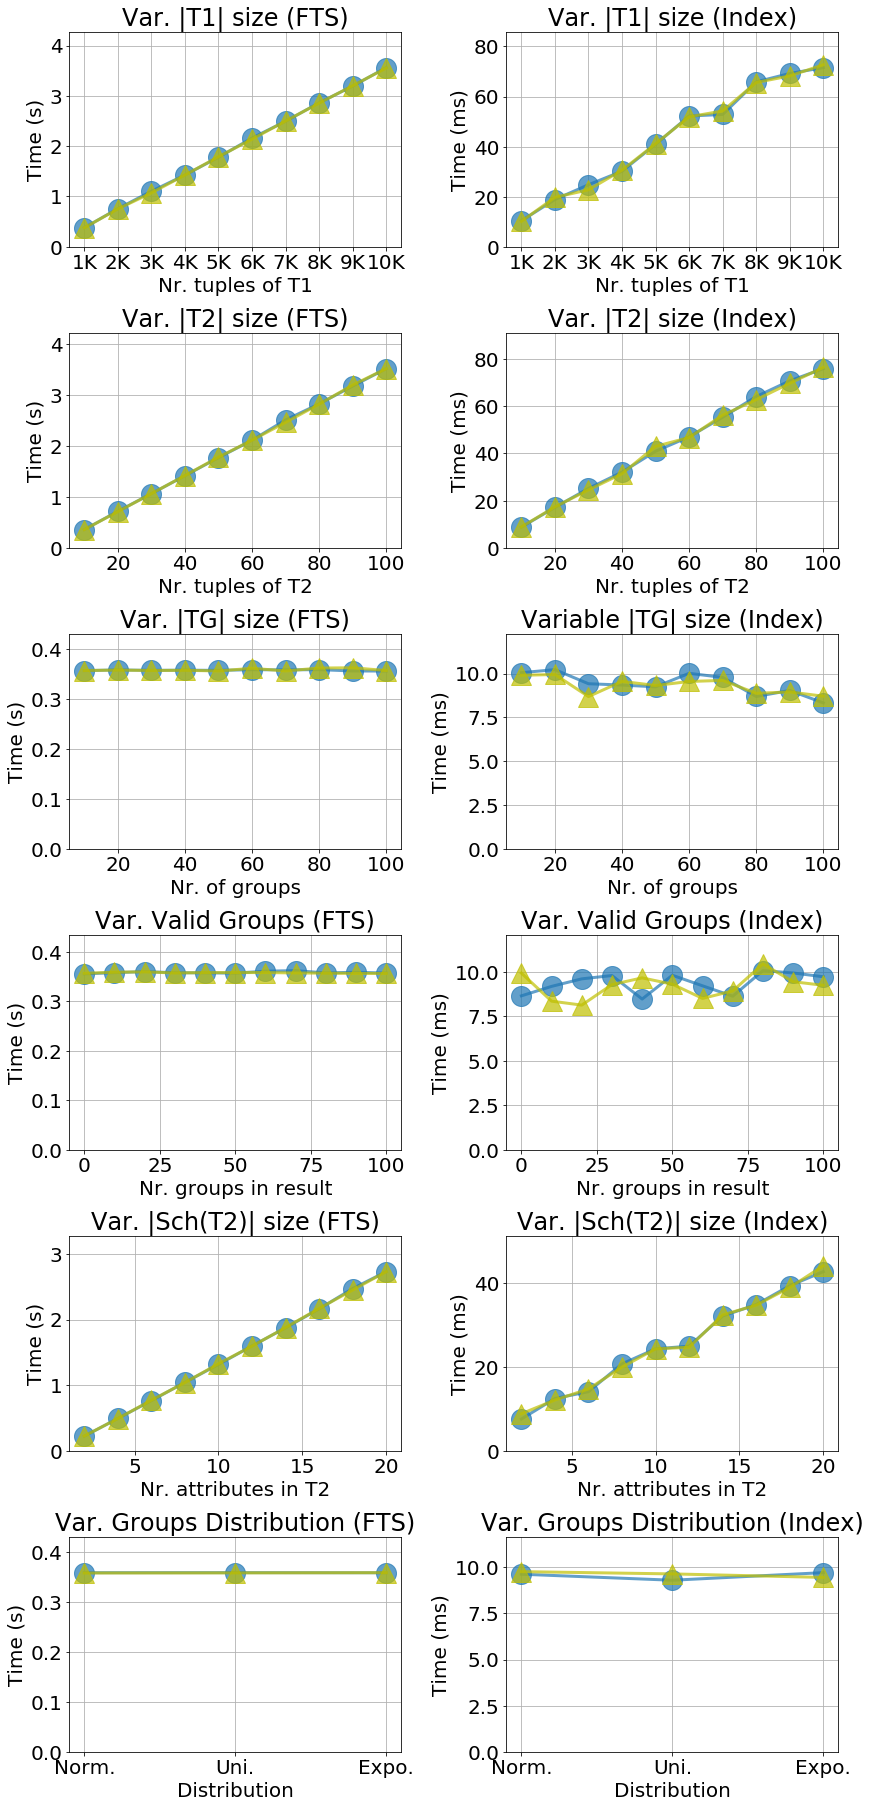

In [6]:
# General plot
plt.rcParams.update({'font.size': 20}) # Augment the font size
fig, axs = plt.subplots(6,2, figsize=(12,25), constrained_layout=True)

# Plot for varing T1 - FTS
x_varT1 = [str(i)+'K' for i in range(1,11)]

axs[0,0].plot(x_varT1, varT1[0], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[0,0].plot(x_varT1, varT1[1], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[0,0].set(title = 'Var. |T1| size (FTS)', xlabel = 'Nr. tuples of T1', ylabel = 'Time (s)')
axs[0,0].grid()
axs[0,0].set_ylim(ymin=0, ymax=max(varT1[0])*1.2)

# Plot for varing T1 - Index
axs[0,1].plot(x_varT1, varT1[2], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[0,1].plot(x_varT1, varT1[3], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[0,1].set(title = 'Var. |T1| size (Index)', xlabel = 'Nr. tuples of T1', ylabel = 'Time (ms)')
axs[0,1].grid()
axs[0,1].set_ylim(ymin=0, ymax=max(varT1[2])*1.2)

# Plot for varing T2 - FTS
x_varT2 = [i*10 for i in range(1,11)]

axs[1,0].plot(x_varT2, varT2[0], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[1,0].plot(x_varT2, varT2[1], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[1,0].set(title = 'Var. |T2| size (FTS)', xlabel = 'Nr. tuples of T2', ylabel = 'Time (s)')
axs[1,0].grid()
axs[1,0].set_ylim(ymin=0, ymax=max(varT2[0])*1.2)

# Plot for varing T2 - Index
axs[1,1].plot(x_varT2, varT2[2], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[1,1].plot(x_varT2, varT2[3], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[1,1].set(title = 'Var. |T2| size (Index)', xlabel = 'Nr. tuples of T2', ylabel = 'Time (ms)')
axs[1,1].grid()
axs[1,1].set_ylim(ymin=0, ymax=max(varT2[2])*1.2)

# Plot for varing TG - FTS
x_varTG = [i*10 for i in range(1,11)]

axs[2,0].plot(x_varTG, varTG[0], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[2,0].plot(x_varTG, varTG[1], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[2,0].set(title = 'Var. |TG| size (FTS)', xlabel = 'Nr. of groups', ylabel = 'Time (s)')
axs[2,0].grid()
axs[2,0].set_ylim(ymin=0, ymax=max(varTG[0])*1.2)

# Plot for varing TG - Index
axs[2,1].plot(x_varTG, varTG[2], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[2,1].plot(x_varTG, varTG[3], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[2,1].set(title = 'Variable |TG| size (Index)', xlabel = 'Nr. of groups', ylabel = 'Time (ms)')
axs[2,1].grid()
axs[2,1].set_ylim(ymin=0, ymax=max(varTG[2])*1.2)

# Plot for varing Valid Groups - FTS
x_varVG = [i*10 for i in range(0,11)]

axs[3,0].plot(x_varVG, varVG[0], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[3,0].plot(x_varVG, varVG[1], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[3,0].set(title = 'Var. Valid Groups (FTS)', xlabel = 'Nr. groups in result', ylabel = 'Time (s)')
axs[3,0].grid()
axs[3,0].set_ylim(ymin=0, ymax=max(varVG[0])*1.2)

# Plot for varing Valid Groups - Index
axs[3,1].plot(x_varVG, varVG[2], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[3,1].plot(x_varVG, varVG[3], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[3,1].set(title = 'Var. Valid Groups (Index)', xlabel = 'Nr. groups in result', ylabel = 'Time (ms)')
axs[3,1].grid()
axs[3,1].set_ylim(ymin=0, ymax=max(varVG[2])*1.2)

# Plot for varing number of attributes in T2 - FTS
x_varAtts = [i*2 for i in range(1,11)]

axs[4,0].plot(x_varAtts, varAtts[0], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[4,0].plot(x_varAtts, varAtts[1], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[4,0].set(title = 'Var. |Sch(T2)| size (FTS)', xlabel = 'Nr. attributes in T2', ylabel = 'Time (s)')
axs[4,0].grid()
axs[4,0].set_ylim(ymin=0, ymax=max(varAtts[0])*1.2)

# Plot for varing number of attributes in T2 - Index
axs[4,1].plot(x_varAtts, varAtts[2], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[4,1].plot(x_varAtts, varAtts[3], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[4,1].set(title = 'Var. |Sch(T2)| size (Index)', xlabel = 'Nr. attributes in T2', ylabel = 'Time (ms)')
axs[4,1].grid()
axs[4,1].set_ylim(ymin=0, ymax=max(varAtts[2])*1.2)

# Plot for varing Groups Distribution - FTS
x_varDist = ['Norm.', 'Uni.', 'Expo.']

axs[5,0].plot(x_varDist, varDist[0], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[5,0].plot(x_varDist, varDist[1], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[5,0].set(title = 'Var. Groups Distribution (FTS)', xlabel = 'Distribution', ylabel = 'Time (s)')
axs[5,0].grid()
axs[5,0].set_ylim(ymin=0, ymax=max(varDist[0])*1.2)

# Plot for varing Groups Distribution - Index
axs[5,1].plot(x_varDist, varDist[2], '-o', markersize=20, linewidth=3, alpha=0.7)
axs[5,1].plot(x_varDist, varDist[3], '-y^', markersize=20, linewidth=3, alpha=0.7)

axs[5,1].set(title = 'Var. Groups Distribution (Index)', xlabel = 'Distribution', ylabel = 'Time (ms)')
axs[5,1].grid()
axs[5,1].set_ylim(ymin=0, ymax=max(varDist[2])*1.2)

plt.show()

In [7]:
variations = ['Var T1', 'Var T2', 'Var TG', 'Var Valid Groups', 'Var Attributes of T2', 'Var Groups Distribution']
types = ['For All (FTS)', 'For Any (FTS)', 'For All (Index)', 'For Any (Index)']
results = [varT1, varT2, varTG, varVG, varAtts, varDist]

In [8]:
outPath = 'results.csv'
outFile = open(outPath, 'w')
for variation in variations:
        for tp in types:
            print(variation + '-' + tp, end=';', file=outFile)
print('', file=outFile)

for iTuple in range(len(varVG[0])):
    for variation in results:
        for var_type in variation:
            if iTuple < len(var_type):
                print(str(var_type[iTuple]).replace('.',','), end=';', file=outFile)
            else:
                print('NaN', end=';', file=outFile)
    print('', file=outFile)
outFile.close()
print('Results saved into ' + outPath)

Results saved into results.csv
